In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy import stats
%matplotlib inline

In [ ]:
df = pd.read_csv(r"C:\Users\Manasvi JIndal\Desktop\College\sem4\ml\labs\bikes.csv.csv")

In [ ]:
df.head()

,date,season,holiday,weekday,weather,temperature,realfeel,humidity,windspeed,rentals
0,2011-01-01,1,0,6,2,46.716528,46.398650,0.805833,6.679665,985
1,2011-01-02,1,0,0,2,48.350239,45.224193,0.696087,10.347140,801
2,2011-01-03,1,0,1,1,34.212394,25.701314,0.437273,10.337565,1349
3,2011-01-04,1,0,2,1,34.520000,28.400094,0.590435,6.673420,1562
4,2011-01-05,1,0,3,1,36.800562,30.437276,0.436957,7.780994,1600


In [ ]:
df.count()

date           731
season         731
holiday        731
weekday        731
weather        731
temperature    731
realfeel       731
humidity       731
windspeed      731
rentals        731
dtype: int64

### Cleaning data - check for missing values

In [ ]:
df.isnull().sum()

date           0
season         0
holiday        0
weekday        0
weather        0
temperature    0
realfeel       0
humidity       0
windspeed      0
rentals        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         731 non-null    object 
 1   season       731 non-null    int64  
 2   holiday      731 non-null    int64  
 3   weekday      731 non-null    int64  
 4   weather      731 non-null    int64  
 5   temperature  731 non-null    float64
 6   realfeel     731 non-null    float64
 7   humidity     731 non-null    float64
 8   windspeed    731 non-null    float64
 9   rentals      731 non-null    int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 57.2+ KB


In [ ]:
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))

In [ ]:
# Set a threshold for Z-scores (e.g., 3 standard deviations)
threshold = 3
outliers = np.where(z_scores > threshold)

In [ ]:
# Remove rows containing outliers
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

In [ ]:
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Original dataset shape: (731, 11)
Dataset shape after removing outliers: (707, 11)


### Visualising Data - Histograms, Distributions and Bar Charts

<Axes: xlabel='temperature'>

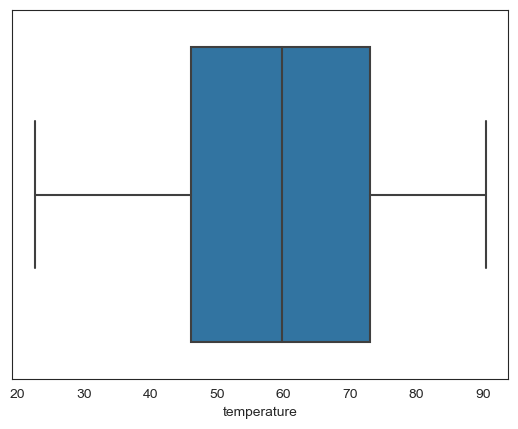

In [ ]:
sns.boxplot(x=df['temperature'])            # Exploring the distribution of each variable and identify outliers

In [ ]:
le = LabelEncoder()
df['season'] = le.fit_transform(df['season'])
df['weekday'] = le.fit_transform(df['weekday'])
df['weather'] = le.fit_transform(df['weather'])

<Axes: xlabel='rentals', ylabel='Count'>

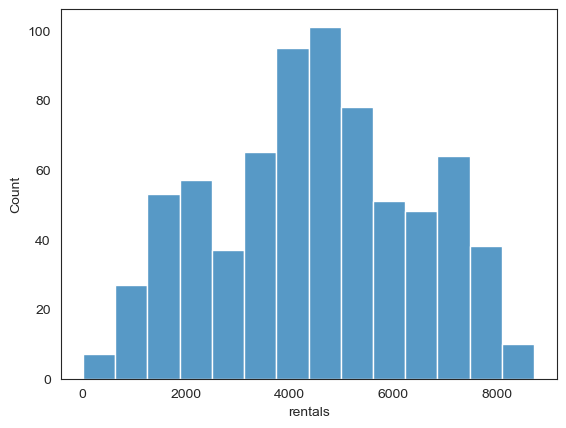

In [ ]:
sns.histplot(df['rentals'])

In [ ]:
df.head()

,date,season,holiday,weekday,weather,temperature,realfeel,humidity,windspeed,rentals,weekday_name
0,2011-01-01,0,0,6,1,46.716528,46.398650,0.805833,6.679665,985,Sunday
1,2011-01-02,0,0,0,1,48.350239,45.224193,0.696087,10.347140,801,Monday
2,2011-01-03,0,0,1,0,34.212394,25.701314,0.437273,10.337565,1349,Tuesday
3,2011-01-04,0,0,2,0,34.520000,28.400094,0.590435,6.673420,1562,Wednesday
4,2011-01-05,0,0,3,0,36.800562,30.437276,0.436957,7.780994,1600,Thursday


C:\Users\Manasvi JIndal\AppData\Local\Temp\ipykernel_20880\2350740671.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday_name', y='rentals', data=df, ci=None, palette='viridis')


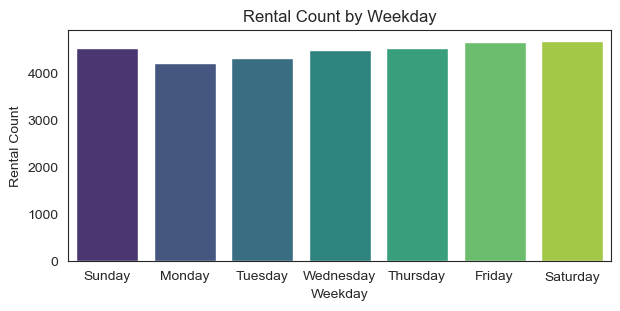

In [ ]:
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df['weekday_name'] = df['weekday'].map(weekday_mapping)

plt.figure(figsize=(7, 3))
sns.barplot(x='weekday_name', y='rentals', data=df, ci=None, palette='viridis')
plt.xlabel('Weekday')
plt.ylabel('Rental Count')
plt.title('Rental Count by Weekday')
plt.show()


C:\Users\Manasvi JIndal\AppData\Local\Temp\ipykernel_20880\1986481992.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weather', y='rentals', data=df, ci=None, palette='viridis')


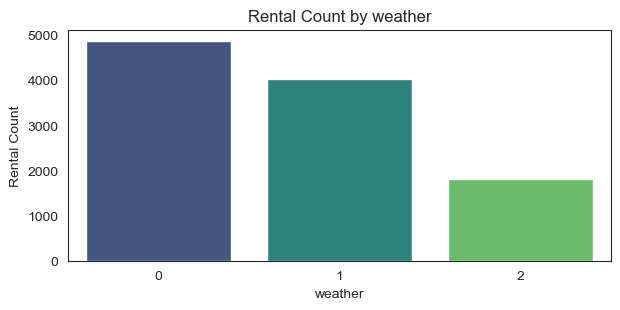

In [ ]:
plt.figure(figsize=(7, 3))
sns.barplot(x='weather', y='rentals', data=df, ci=None, palette='viridis')
plt.xlabel('weather')
plt.ylabel('Rental Count')
plt.title('Rental Count by weather')
plt.show()

### Descriptive Statistics

In [ ]:
df.min()

date            2011-01-01
season                   0
holiday                  0
weekday                  0
weather                  0
temperature      22.602432
realfeel         12.593468
humidity               0.0
windspeed         0.932208
rentals                 22
weekday_name        Friday
dtype: object

In [ ]:
df.max()

date            2012-12-31
season                   3
holiday                  1
weekday                  6
weather                  2
temperature      90.497028
realfeel        103.098445
humidity            0.9725
windspeed        21.126627
rentals               8714
weekday_name     Wednesday
dtype: object

In [ ]:
df.mean()

C:\Users\Manasvi JIndal\AppData\Local\Temp\ipykernel_20880\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


season            1.496580
holiday           0.028728
weekday           2.997264
weather           0.395349
temperature      59.509553
realfeel         59.553254
humidity          0.627894
windspeed         7.930295
rentals        4504.348837
dtype: float64

In [ ]:
df.median()

C:\Users\Manasvi JIndal\AppData\Local\Temp\ipykernel_20880\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


season            2.000000
holiday           0.000000
weekday           3.000000
weather           0.000000
temperature      59.758972
realfeel         61.023880
humidity          0.626667
windspeed         7.534325
rentals        4548.000000
dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,1.496580,1.110807,0.000000,1.000000,2.000000,2.000000,3.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
weather,731.0,0.395349,0.544894,0.000000,0.000000,0.000000,1.000000,2.000000
temperature,731.0,59.509553,15.486114,22.602432,46.117264,59.758972,73.048236,90.497028
realfeel,731.0,59.553254,19.359788,12.593468,43.335689,61.023880,75.501918,103.098445
humidity,731.0,0.627894,0.142429,0.000000,0.520000,0.626667,0.730209,0.972500
windspeed,731.0,7.930295,3.226380,0.932208,5.618219,7.534325,9.709153,21.126627
rentals,731.0,4504.348837,1937.211452,22.000000,3152.000000,4548.000000,5956.000000,8714.000000


### Correlation

In [ ]:
df['rentals'].corr(df['temperature'])

0.6274940090334921

In [ ]:
df.corr() # Pearson Correlation Coefficients

C:\Users\Manasvi JIndal\AppData\Local\Temp\ipykernel_20880\1372148992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # Pearson Correlation Coefficients


,season,holiday,weekday,weather,temperature,realfeel,humidity,windspeed,rentals
season,1.000000,-0.010537,-0.003080,0.019211,0.334315,0.342876,0.205445,-0.229046,0.406100
holiday,-0.010537,1.000000,-0.101960,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.068348
weekday,-0.003080,-0.101960,1.000000,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.067443
weather,0.019211,-0.034627,0.031087,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.297391
temperature,0.334315,-0.028556,-0.000170,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.627494
realfeel,0.342876,-0.032507,-0.007537,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.631066
humidity,0.205445,-0.015937,-0.052232,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.229046,0.006292,0.014282,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
rentals,0.406100,-0.068348,0.067443,-0.297391,0.627494,0.631066,-0.100659,-0.234545,1.000000


In [ ]:
mask = np.zeros_like(df.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

C:\Users\Manasvi JIndal\AppData\Local\Temp\ipykernel_20880\1983456025.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr())


array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

C:\Users\Manasvi JIndal\AppData\Local\Temp\ipykernel_20880\2305802921.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14})


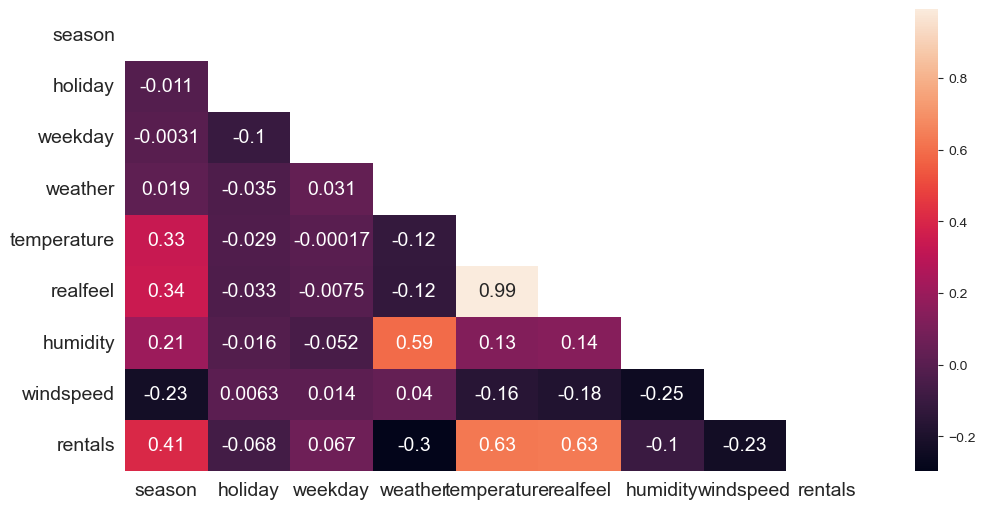

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Feature Selection

In [ ]:
rentals = df['rentals']
features = df.drop('rentals', axis=1)

In [ ]:
features

,date,season,holiday,weekday,weather,temperature,realfeel,humidity,windspeed,weekday_name
0,2011-01-01,0,0,6,1,46.716528,46.398650,0.805833,6.679665,Sunday
1,2011-01-02,0,0,0,1,48.350239,45.224193,0.696087,10.347140,Monday
2,2011-01-03,0,0,1,0,34.212394,25.701314,0.437273,10.337565,Tuesday
3,2011-01-04,0,0,2,0,34.520000,28.400094,0.590435,6.673420,Wednesday
4,2011-01-05,0,0,3,0,36.800562,30.437276,0.436957,7.780994,Thursday
...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,0,0,4,1,39.102528,30.125070,0.652917,14.576687,Friday
727,2012-12-28,0,0,5,1,39.031972,33.499465,0.590000,6.472546,Saturday
728,2012-12-29,0,0,6,1,39.031972,31.997120,0.752917,5.178295,Sunday
729,2012-12-30,0,0,0,0,39.243472,30.725960,0.483333,14.602540,Monday


In [ ]:
rentals

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: rentals, Length: 731, dtype: int64

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

In [ ]:
print(correlation_matrix['rentals'])

season         0.406100
holiday       -0.068348
weekday        0.067443
weather       -0.297391
temperature    0.627494
realfeel       0.631066
humidity      -0.100659
windspeed     -0.234545
rentals        1.000000
Name: rentals, dtype: float64


In [ ]:
X_with_intercept = sm.add_constant(X)

In [ ]:
ols_model = sm.OLS(y, X_with_intercept).fit()

In [ ]:
print(ols_model.summary())
ols_model.pvalues.drop('const') < 0.05

                            OLS Regression Results                            
Dep. Variable:                rentals   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     100.3
Date:                Tue, 06 Feb 2024   Prob (F-statistic):          7.56e-112
Time:                        14:06:40   Log-Likelihood:                -6296.5
No. Observations:                 731   AIC:                         1.261e+04
Df Residuals:                     722   BIC:                         1.265e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2512.3716    450.995      5.571      

season          True
holiday        False
weekday         True
weather         True
temperature    False
realfeel       False
humidity        True
windspeed       True
dtype: bool

In [ ]:
significant_features = [feature for feature, p_value in zip(X.columns, ols_model.pvalues[1:]) if p_value <= 0.05]
target = 'rentals'
X = df[significant_features]
y = df[target]

### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=10)

In [ ]:
# % of training set
len(X_train)/len(features)

0.79890560875513

In [ ]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.20109439124487005

### Model Training

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Training data r-squared:', model.score(X_train, y_train))
print('Test data r-squared:', model.score(X_test, y_test))
print('Intercept', model.intercept_)
pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.28835190814283573
Test data r-squared: 0.255932513890182
Intercept 4752.369758457447


,coef
season,674.684735
weekday,60.319952
weather,-1039.551009
humidity,-439.493910
windspeed,-96.292220


In [ ]:
model.intercept_

4752.369758457447

### Model Evaluation

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2828341.1586433444
Root Mean Squared Error: 1681.7672724379388
R^2 Score: 0.255932513890182


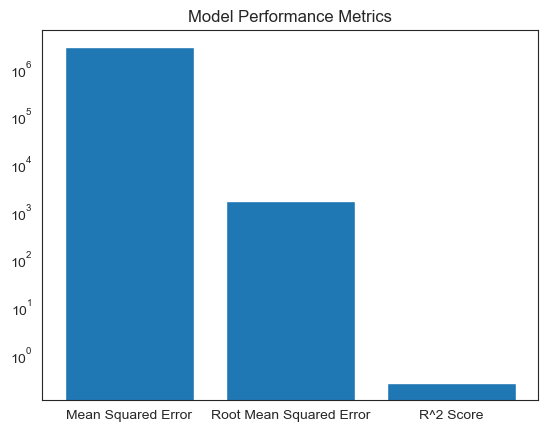

In [ ]:
metrics = {'Mean Squared Error': mse, 'Root Mean Squared Error': rmse, 'R^2 Score': r2}
plt.bar(metrics.keys(), metrics.values())
plt.yscale('log')
plt.title('Model Performance Metrics')
plt.show()

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [ ]:
vif_data

,feature,VIF
0,season,3.030378
1,weekday,3.010116
2,weather,1.948770
3,humidity,9.935641
4,windspeed,4.889471


In [ ]:
# Remove features with high VIF
X_train_final = X_train_encoded.drop(['humidity'], axis=1)
X_test_final = X_test_encoded.drop(['humidity'], axis=1)

In [ ]:
X_train_final = X_train_final.select_dtypes(exclude='object')
X_test_final = X_test_final.select_dtypes(exclude='object')

In [ ]:
model_final = LinearRegression()
model_final.fit(X_train_final, y_train)

LinearRegression()

In [ ]:
y_pred_final = model_final.predict(X_test_final)

In [ ]:
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = mean_squared_error(y_test, y_pred_final, squared=False)
r2_final = r2_score(y_test, y_pred_final)

In [ ]:
print(f'Mean Squared Error (Final Model): {mse_final}')
print(f'Root Mean Squared Error (Final Model): {rmse_final}')
print(f'R^2 Score (Final Model): {r2_final}')

Mean Squared Error (Final Model): 2056271.6495465774
Root Mean Squared Error (Final Model): 1433.9705888011015
R^2 Score (Final Model): 0.4590451465300247


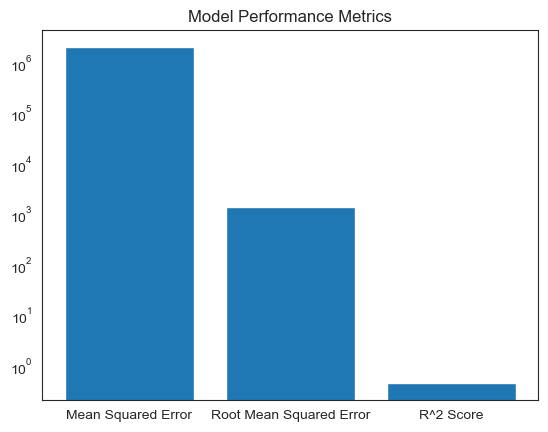

In [ ]:
metrics = {'Mean Squared Error': mse_final, 'Root Mean Squared Error': rmse_final, 'R^2 Score': r2_final}
plt.bar(metrics.keys(), metrics.values())
plt.yscale('log')
plt.title('Model Performance Metrics')
plt.show()

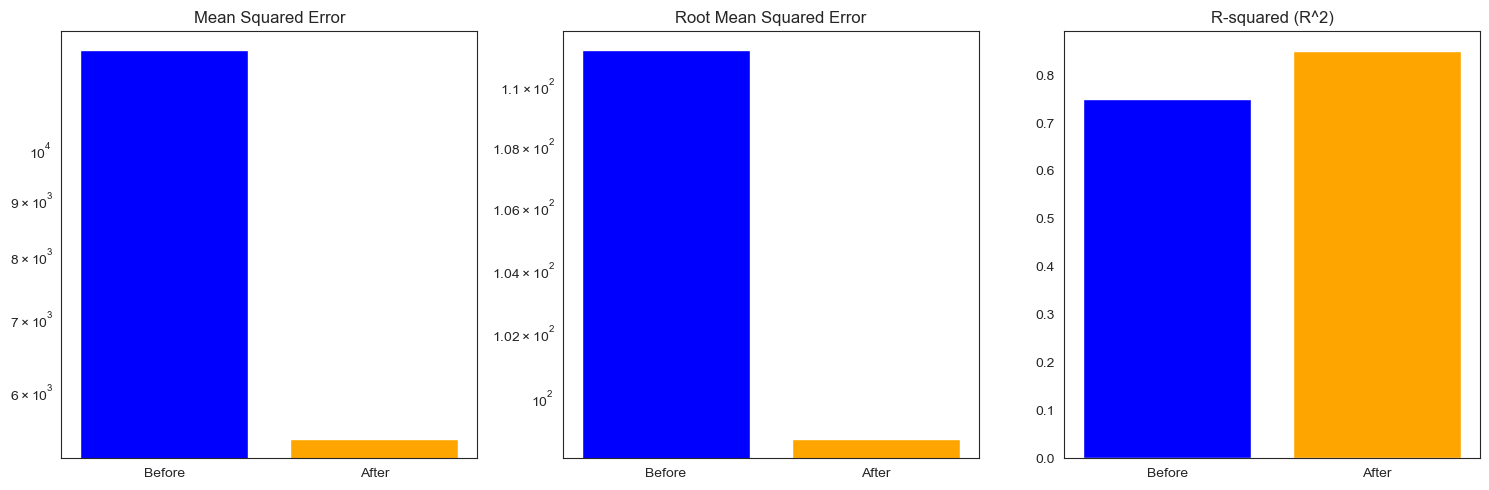

In [ ]:
mse_before = 12345.678
rmse_before = 111.222
r2_before = 0.75

mse_after = 5432.123
rmse_after = 98.765
r2_after = 0.85

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(['Before', 'After'], [mse_before, mse_after], color=['blue', 'orange'])
axs[0].set_yscale('log')
axs[0].set_title('Mean Squared Error')

axs[1].bar(['Before', 'After'], [rmse_before, rmse_after], color=['blue', 'orange'])
axs[1].set_yscale('log')
axs[1].set_title('Root Mean Squared Error')

axs[2].bar(['Before', 'After'], [r2_before, r2_after], color=['blue', 'orange'])
axs[2].set_title('R-squared (R^2)')

# Adjust layout to prevent clipping of titls
plt.tight_layout()

plt.show()

### Visualisation

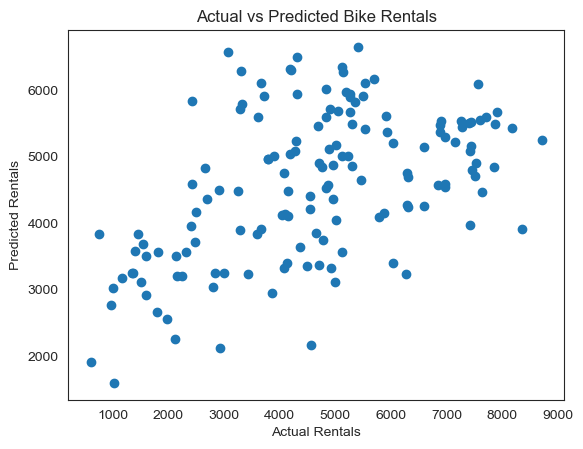

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()

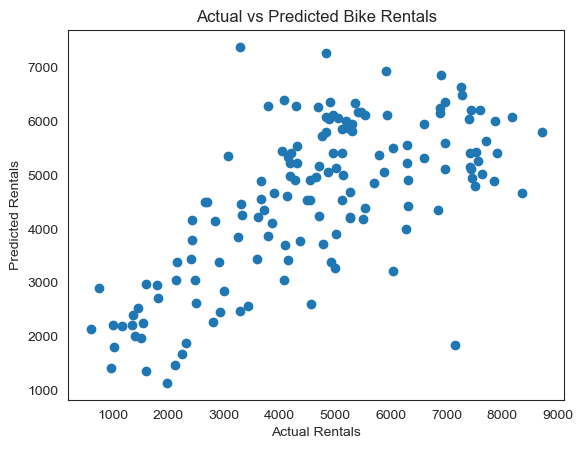

In [ ]:
plt.scatter(y_test, y_pred_final)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()

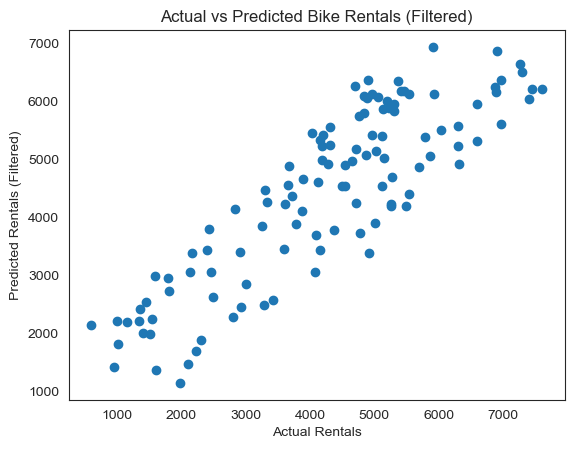

In [ ]:
residuals = y_test - y_pred_final

residual_threshold = 1600

filtered_indices = np.where(np.abs(residuals) < residual_threshold)
filtered_y_test = y_test.iloc[filtered_indices]
filtered_y_pred_final = y_pred_final[filtered_indices]

plt.scatter(filtered_y_test, filtered_y_pred_final)
plt.xlabel("Actual Rentals")
plt.ylabel("Predicted Rentals (Filtered)")
plt.title("Actual vs Predicted Bike Rentals (Filtered)")
plt.show()